# ガウス分布におけるMAP推定



inverse gammaについて
$$ f(x,a,b) = \frac{b^a}{\Gamma(a)}x^{-a-1}\exp(-\frac{b}{x}) ~~~~(x>0)$$
の式のa,bが変わるとinverse gammmaがどうなるか考察する
ただし、データは標準正規分布に従うとし、
$$\Gamma(x) = \int _{0}^{\infty} u^{x-1} e^{-u}　dx$$というガンマ関数である。

C:\Users\Taniguchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Taniguchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Taniguchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


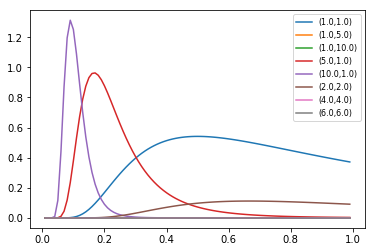

In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

A = [1.,1.,1.,5.,10.,2.,4.,6.]
B = [1.,5.,10.,1.,1.,2.,4.,6.]
for (a,b) in zip(A,B):
    x = np.arange(0,1,0.01)
    c = integrate.quad(lambda u: (u**(a+b-1)) * (np.exp(-u)), 0, np.inf)[0]
    y = ((b**a)/c)*(x**(-a-1))*np.exp(-b/x)
    plt.plot(x,y,label="({},{})".format(a,b))
    
    plt.legend(fontsize=8)

では、ガウス分布におけるMAP推定を考察する
データは標準正規分布に従い、期待値は0とし、事前分布は共役分布であるガウス分布とする。
事後分布における共分散thetaについて最適解を求め、その最適解を用いて上記で考えたリストAとBの組み合わせの中でどの組み合わせが標準正規分布の分散1に近いかを考察する。

In [64]:
def sigmaroop(datalist,mu):
    x = 0
    for i in datalist:
        x = x + (i-mu)**2
    return x

In [65]:
def theta_best(a,b,n,mu,datalist):
    theta = (sigmaroop(datalist,mu) + 2*b)/(2*a + n + 2)
    return theta

In [70]:
data = np.random.randn(100)
for (a,b) in zip(A,B):
    print(theta_best(a,b,100,0,data))

0.917622075854
0.994545152777
1.09069899893
0.852077641865
0.782235212204
0.91917637631
0.922115417171
0.924848209551
